## Author: Vaishnav Krisha P
### Reference : CodeBasics youtube channel
This is a project to classiy the hanwritten images
#### DeepLearning : 01

In [25]:
# Importing necessory libraries 
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignoring the incompactab;e warnings 
import warnings
warnings.filterwarnings(action="ignore")

In [26]:
# Loading the data set from the keras
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [27]:
# shape of the dataset
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

### THE VISUALISATION OF NUMBERS

In [28]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

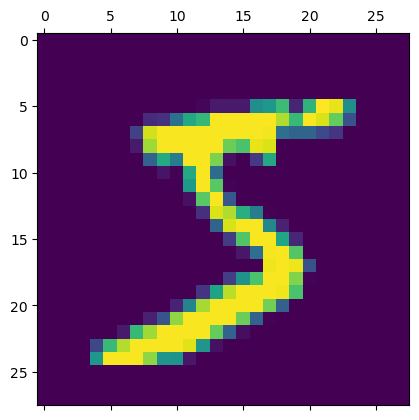

In [29]:
plt.matshow(X_train[0])

In [30]:
y_train[0]

5

### SCALING OF THE NUMBERS

In [31]:
X_train = X_train/255
X_test = X_test / 255

### FLATTENING THE 28 * 28 array

In [32]:
X_train = X_train.reshape(len(X_train),28*28)
X_test = X_test.reshape(len(X_test),28*28)

In [33]:
X_test.shape,X_train.shape

((10000, 784), (60000, 784))

### SIMPLE NEURAL NETWORK

In [35]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation="sigmoid")
])

### COMPILING

In [36]:
model.compile(
    optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"]
)

### TRAINING OF THE MODEL

In [39]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4610 - accuracy: 0.8815
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9261


* Got 92.61% accuracy.
### Adding a hiddenlayer 

In [48]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"]
)

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2780 - accuracy: 0.9191
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1258 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0886 - accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0361 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0296 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0243 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.020

* Accuracy increased to 98.39
#### after increasing the epochs 5 -> 10
* Accuracy increased to 99.37

### EVALUATION THE MODEL

In [50]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9777


[0.08250568062067032, 0.9776999950408936]

### VALIDATION OF THE MODEL

In [49]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [56]:
np.argmax(y_pred[0])

7

In [59]:
y_pred_labels = [np.argmax(x) for x in y_pred] 

### CONFUSION MATRIX

In [60]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

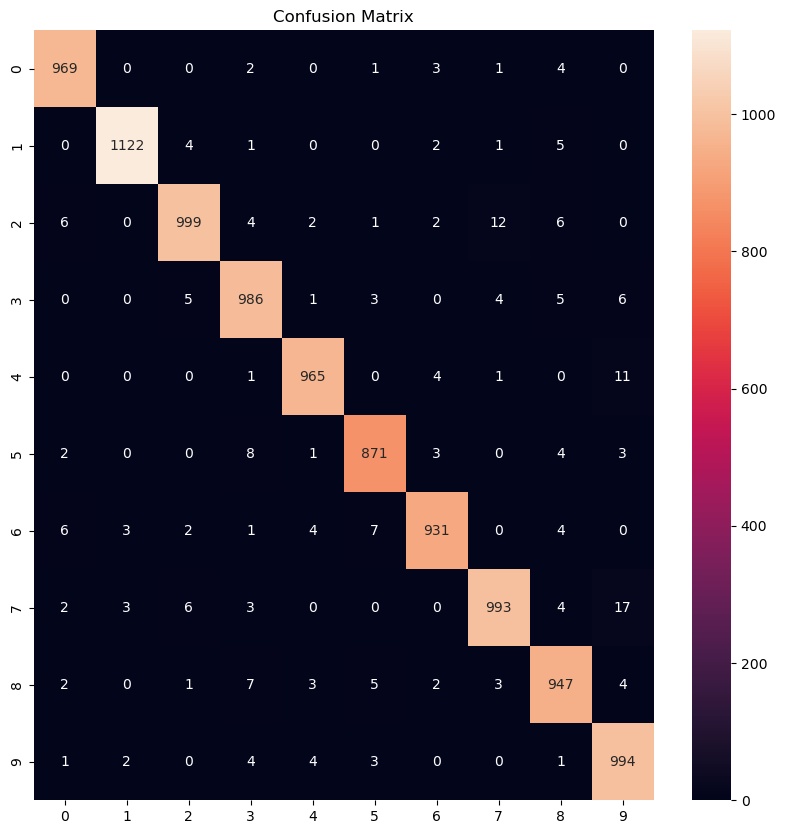

In [68]:
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix")
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [69]:
# end of this project with 99%+ accuracy